A házi feladatban a HousingData.csv kell felhasználni.

1. Adatértelmezés: Értelmezd az adatot. Mutasd be a különböző változók eloszlását, központi tendenciáit és szórását, az oszlopokban milyen változók szerepelnek, milyen értékeket vesznek fel.

2. Korrelációs elemzés: Keresd meg azt a változót, amely a legnagyobb mértékben korrelál a középértékű ház árával (MEDV). Melyik változók korrelálnak pozitívan, és melyik negatívan az árral?

3. Többváltozós regresszió: Készíts egy többváltozós lineáris regressziós modellt, melyben több különböző változót használsz fel az ár (MEDV) becslésére. Értékeld a modell teljesítményét és az egyes változók hozzájárulását a modellhez.

4. Modell teljesítményének vizsgálata: értékeld ki a modell pontosságát a teszt adathalmazon. Plotold is ki.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
housing = pd.read_csv('HousingData.csv')

    1. Adatértelmezés: Értelmezd az adatot. Mutasd be a különböző változók eloszlását, központi tendenciáit és szórását, az oszlopokban milyen változók szerepelnek, milyen értékeket vesznek fel.


Adatok:

Név |Leírás |Min |Max
----|-------|----|---
CRIM| Crime Rate, egy főre jutó bűncselekmények száma a szomszédságban |0.00632 | 88.9762
ZN| nagy telkek száma a szomszédságban|0 | 100
INDUS| eladó-nem eladó ingatlanok aránya a szomszédságban|0.46 | 27.74
CHAS| Charles folyóhoz közeliséget jelenti|0 |1
NOX| nitrogén-oxid aránya a levegőben, a levegő szennyezettségét jellemzi|0.385 | 0.871
RM| szobák száma átlagosan a szomszédságban|3.561 |8.78
AGE| 1940 előtt épült házak aránya a szomszédságban|2.9 |100
DIS| súlyozott távolság munkavégzési központoktól|1.1296 |12.1265
RAD| autópályák elérhetőségének mérőszáma|1 | 24
TAX| ingatlan adó mértéke a szomszédságban|187 |711
PTRATIO| tanár-diák arány a közeli iskolákban|12.6 |22   
B| feketék aránya a szomszédságban|0.32 | 396,9
LSTAT| szegények aránya a szomszédságban|1.73 |37.97
MEDV| a középértékű ház ára|5 | 50

In [3]:
mean = housing.mean()
median = housing.median()
mode = housing.mode().iloc[0]

housing_summary = pd.DataFrame({'Mean': mean, 'Median': median, 'Mode': mode})

print(housing_summary)

               Mean      Median       Mode
CRIM       3.611874    0.253715    0.01501
ZN        11.211934    0.000000    0.00000
INDUS     11.083992    9.690000   18.10000
CHAS       0.069959    0.000000    0.00000
NOX        0.554695    0.538000    0.53800
RM         6.284634    6.208500    5.71300
AGE       68.518519   76.800000  100.00000
DIS        3.795043    3.207450    3.49520
RAD        9.549407    5.000000   24.00000
TAX      408.237154  330.000000  666.00000
PTRATIO   18.455534   19.050000   20.20000
B        356.674032  391.440000  396.90000
LSTAT     12.715432   11.430000    6.36000
MEDV      22.532806   21.200000   50.00000


    
    
    2. Korrelációs elemzés: Keresd meg azt a változót, amely a legnagyobb mértékben korrelál a középértékű ház árával (MEDV). Melyik változók korrelálnak pozitívan, és melyik negatívan az árral?

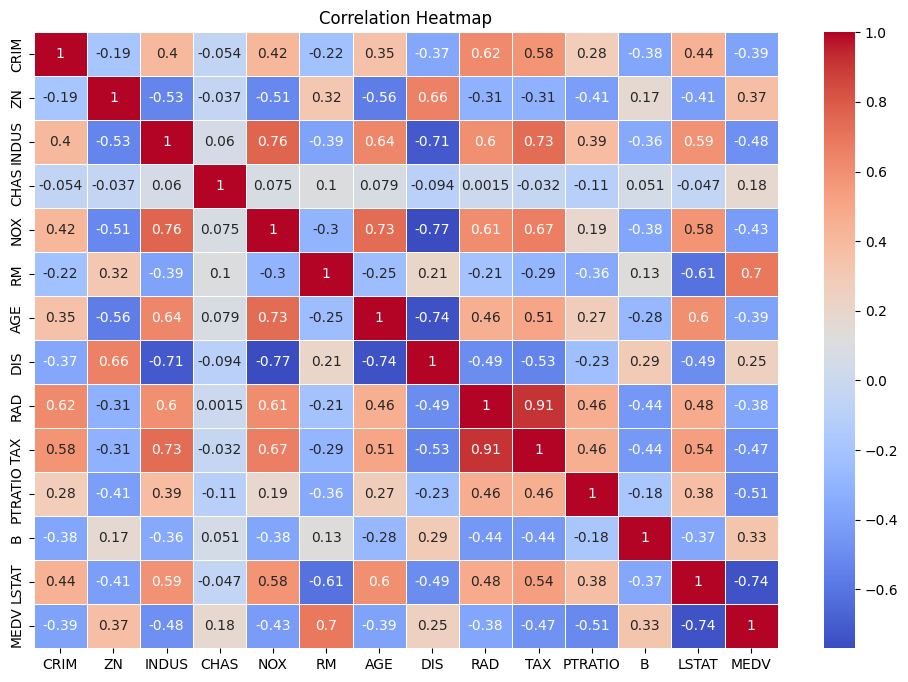

In [4]:
corr_matrix = housing.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


A középértékű ház árát legjobban a szobák száma befolyásolja, 0.7-es korrelációval.


Pozitív korrelációs változók: B, DIS, RM, ZN, CHAS
Név |Jelentés |Ráta
----|---------|----
RM  |szobák száma |0.7
ZN  |nagy telkek száma |0.37
B   |fekete lakosság aránya |0.33
DIS |munkahely távolság |0.25
CHAS|Charles folyó távolsága |0.18

Negatív korrelációs változók: CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO, LSTAT
Név |Jelentés |Ráta
----|---------|----
LSTAT  |szegények aránya |-0.74
PTRATIO  |tanár-diák arány az iskolában |-0.51
INDUS   |kereskedelmi terület aránya |-0.48
TAX |adókulcs mértéke |-0.47
NOX|levegő szennyezettség |-0.43
CRIM|bűnözési arány |-0.39
AGE|régi házak aránya |-0.39
RAD|autópálya távolsága |-0.38


    3. Többváltozós regresszió: Készíts egy többváltozós lineáris regressziós modellt, melyben több különböző változót használsz fel az ár (MEDV) becslésére. Értékeld a modell teljesítményét és az egyes változók hozzájárulását a modellhez.



Próba 3 pozitív korrelációs változóval:

In [5]:
housing = housing.dropna(subset=['LSTAT'])

In [6]:
Y = housing['MEDV']
X = housing[['RM', 'B', 'LSTAT']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [7]:
regressor.coef_

array([ 5.1059146 ,  0.0140547 , -0.56448586])

In [8]:
regressor.intercept_

-7.276676242529138

    4. Modell teljesítményének vizsgálata: értékeld ki a modell pontosságát a teszt adathalmazon. Plotold is ki.

In [9]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
436     9.6  15.910032
272    24.4  27.293364
449    13.0  18.863337
466    19.0  13.742139
378    13.1  17.504701
..      ...        ...
122    20.5  18.352392
47     16.6  18.419499
17     17.5  20.462402
467    19.1  15.995474
503    23.9  30.736796

[146 rows x 2 columns]


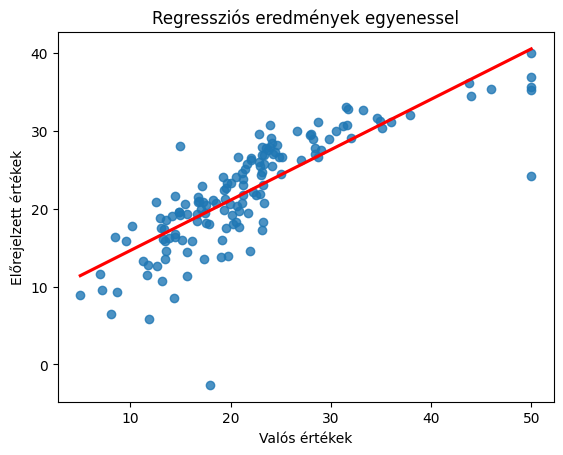

Mean absolute error: 3.74
Mean squared error: 26.98
Root mean squared error: 5.19


In [10]:
sns.regplot(x='Actual', y='Predicted', data=results, ci=None, line_kws={'color': 'red'})

plt.xlabel('Valós értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Regressziós eredmények egyenessel')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Következtetés:

Pozitív korrelációs változókkal aránylag pontos predikciókat érhetünk el, még ha nem is a legerősebbeket használjuk fel a modellhez.

Próba más változókkal: 3 legerősebb negatív és pozitív változók


In [11]:
housing = housing.dropna(subset=['INDUS'])

In [12]:
y = housing['MEDV']
X = housing[['LSTAT', 'PTRATIO', 'INDUS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


     Actual  Predicted
60     18.7  21.399337
68     17.4  22.239128
34     13.5  13.964610
500    16.8  20.724775
78     21.2  22.733258
..      ...        ...
119    19.3  22.766678
321    23.1  26.569619
400     5.6   9.009992
30     12.7  12.101685
170    17.4  24.861067

[140 rows x 2 columns]


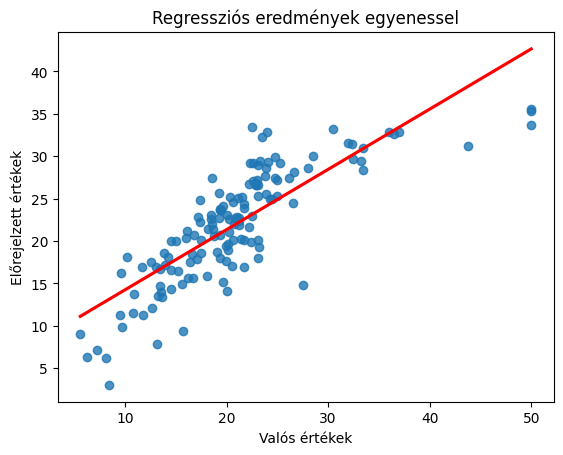

Mean absolute error: 3.50
Mean squared error: 21.10
Root mean squared error: 4.59


In [13]:
sns.regplot(x='Actual', y='Predicted', data=results, ci=None, line_kws={'color': 'red'})
plt.xlabel('Valós értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Regressziós eredmények egyenessel')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Következtetés:

A 3 legerősebb negatív korrelációs változóval sikerült pontosabb modellt alkotni, mint 3 "véletlenszerű" pozitív korrelációs változóval.

In [14]:
housing = housing.dropna(subset=['ZN'])

In [15]:
y = housing['MEDV']
X = housing[['RM', 'ZN', 'B']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


     Actual  Predicted
322    20.4  21.115331
335    21.1  21.082494
129    14.3  17.798730
394    12.7  19.851082
76     20.0  22.531655
..      ...        ...
144    11.8  11.773024
27     14.8  19.070960
8      16.5  18.185243
462    19.5  23.381128
119    19.3  18.445518

[135 rows x 2 columns]


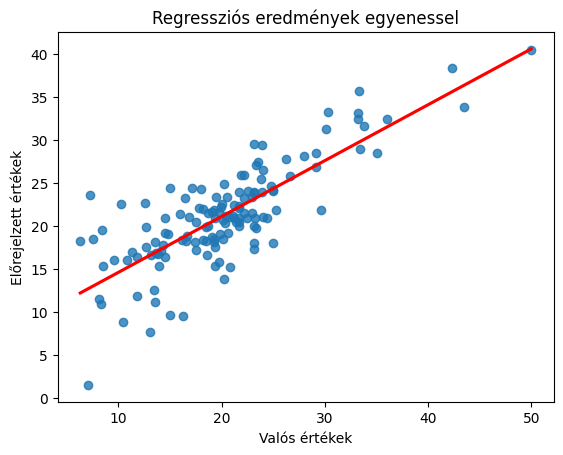

Mean absolute error: 3.37
Mean squared error: 20.09
Root mean squared error: 4.48


In [16]:
sns.regplot(x='Actual', y='Predicted', data=results, ci=None, line_kws={'color': 'red'})
plt.xlabel('Valós értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Regressziós eredmények egyenessel')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Következtetés:

A 3 legerősebb pozitív változó (amik erősségben mégis gyengébbek az előző próbában használt negatívakkal) pontosabb modellt eredményeztek többváltozós regresszió esetén.

Próba: 2 legerősebb pozitív negatív változók

In [17]:
y = housing['MEDV']
X = housing[['RM', 'ZN', 'LSTAT', 'PTRATIO']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
322    20.4  23.722792
335    21.1  23.014108
129    14.3  14.267516
394    12.7  17.421292
76     20.0  23.050710
..      ...        ...
144    11.8   9.988531
27     14.8  16.922857
8      16.5  12.494902
462    19.5  20.763744
119    19.3  20.358394

[135 rows x 2 columns]


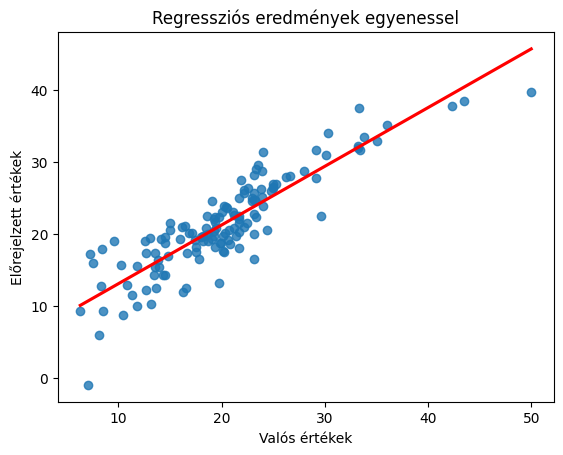

Mean absolute error: 2.80
Mean squared error: 12.99
Root mean squared error: 3.60


In [18]:
sns.regplot(x='Actual', y='Predicted', data=results, ci=None, line_kws={'color': 'red'})
plt.xlabel('Valós értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Regressziós eredmények egyenessel')
plt.show()


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Következtetés:

Az eddig messze legpontosabb modellt az erős pozitív és negatív korrelációs változók használatával volt lehetséges megalkotni.

Próba: 3 legerősebb pozitív + negatív változók

In [19]:
y = housing['MEDV']
X = housing[['RM', 'ZN', 'B', 'LSTAT', 'PTRATIO','INDUS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
322    20.4  23.590941
335    21.1  22.737271
129    14.3  15.263342
394    12.7  18.165796
76     20.0  23.190867
..      ...        ...
144    11.8  10.913595
27     14.8  16.133158
8      16.5  12.736251
462    19.5  21.541492
119    19.3  20.414322

[135 rows x 2 columns]


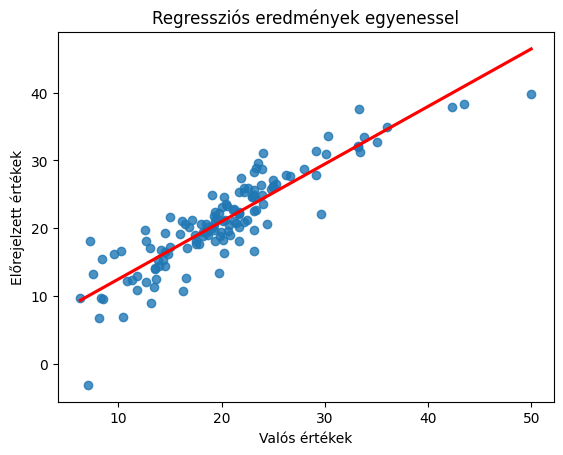

Mean absolute error: 2.62
Mean squared error: 11.84
Root mean squared error: 3.44


In [20]:
sns.regplot(x='Actual', y='Predicted', data=results, ci=None, line_kws={'color': 'red'})
plt.xlabel('Valós értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Regressziós eredmények egyenessel')
plt.show()


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Következtetés:

Több erős pozitív és negatív változó együttes használata pontosabb modellt eredményez.